Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 2019/2020  
http://www.fer.unizg.hr/predmet/su

------------------------------

### Laboratorijska vježba 1: Regresija

*Verzija: 1.2  
Zadnji put ažurirano: 27. rujna 2019.*

(c) 2015-2019 Jan Šnajder, Domagoj Alagić 

Objavljeno: **30. rujna 2019.**  
Rok za predaju: **21. listopada 2019. u 07:00h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od deset zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline
import warnings
warnings.filterwarnings("ignore")

Populating the interactive namespace from numpy and matplotlib


## Zadatci

### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# Vaš kôd ovdje
fi = PolynomialFeatures(1)
transformed = fi.fit_transform(X)

print(transformed)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [5]:
from numpy import linalg

In [6]:
# Vaš kôd ovdje
pseudoinverse = np.dot(linalg.inv(np.dot(np.transpose(transformed),transformed)),np.transpose(transformed))
realpseudoinverse = linalg.pinv(transformed)
w = np.dot(pseudoinverse,y)
print("Calculated pseudoinverse:")
print(pseudoinverse)
print("\nLinalg pseudoinverse:")
print(realpseudoinverse)
print("\nWeights:")
print(w)

Calculated pseudoinverse:
[[ 0.6         0.4         0.2        -0.2       ]
 [-0.2        -0.08571429  0.02857143  0.25714286]]

Linalg pseudoinverse:
[[ 0.6         0.4         0.2        -0.2       ]
 [-0.2        -0.08571429  0.02857143  0.25714286]]

Weights:
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

ℎ(x):
[2.2        2.65714286 3.11428571 4.02857143]

Error:
4.085714285714286

Mean Squared Error:
2.042857142857143


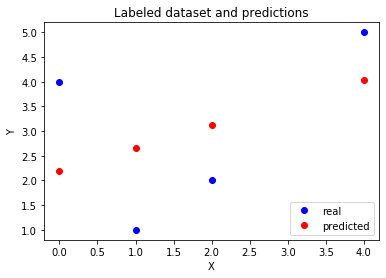

In [7]:
# Vaš kôd ovdje
from sklearn.metrics import mean_squared_error

h = np.dot(w,np.transpose(transformed))
print("ℎ(x):")
print(h)

error = sum((y-h)**2)/2

MSE = mean_squared_error(y,h)

print("\nError:")
print(error)
print("\nMean Squared Error:")
print(MSE)

plt.title("Labeled dataset and predictions")
plt.plot(X,y,'bo',label='real')
plt.plot(X,h,'ro',label='predicted')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc='lower right')
plt.show()

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [8]:
# Vaš kôd ovdje
try:
    weights = np.dot(linalg.inv(transformed),y)
    print("Weights without pseudoinverse:")
    print(weights)
except Exception as e:
    print(e)
    
pseudoinverse = np.dot(linalg.inv(np.dot(np.transpose(transformed),transformed)),np.transpose(transformed))

weights = np.dot(pseudoinverse,y)

print("\nWeights using pseudoinverse:")
print(weights)

Last 2 dimensions of the array must be square

Weights using pseudoinverse:
[2.2        0.45714286]


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Uvjerite se da su težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [9]:
from sklearn.linear_model import LinearRegression

[2.2        0.45714286]
0.0
[2.2        2.65714286 3.11428571 4.02857143]
2.042857142857143


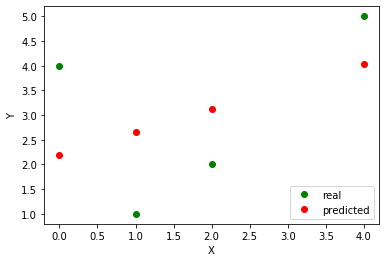

In [10]:
# Vaš kôd ovdje
reg = LinearRegression(False).fit(transformed, y)
print(reg.coef_)
print(reg.intercept_)

prediction = reg.predict(transformed)
print(prediction)

MSE = mean_squared_error(y,prediction)


plt.plot(X,y,'go',label = 'real')
plt.plot(X,prediction,'ro',label='predicted')
plt.ylabel("Y")
plt.xlabel("X")
plt.legend(loc="lower right")

print(MSE)

### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [11]:
from numpy.random import normal

def make_labels(X, f, noise=0) :
    
    Y = np.array([f(x)+normal(0,noise) for x in X])
    
    return Y

In [12]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

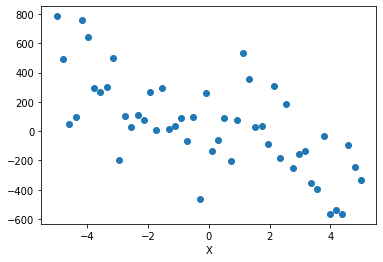

In [13]:
# Vaš kôd ovdje
X = make_instances(-5,5,50)

function = lambda x : 5 + x -2*(x**2) - 5*(x**3)

y = make_labels(X,function,200)
plt.scatter(X, y)
plt.xlabel("X")
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

Mean Squared Error:
48619.01554594854


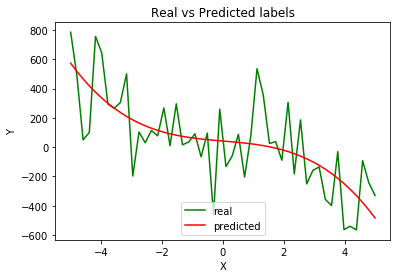

In [14]:
# Vaš kôd ovdje
transformed = PolynomialFeatures(3).fit_transform(X)

reg = LinearRegression(False).fit(transformed, y)

prediction = reg.predict(transformed)

MSE = mean_squared_error(y,prediction)

plt.title("Real vs Predicted labels")
plt.plot(X,y,'g',label = 'real')
plt.plot(X,prediction,'r',label='predicted')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="lower center")

print("Mean Squared Error:")
print(MSE)

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?


Minimal error : 25101.644176585454

Belongs to polynom of degree : 20


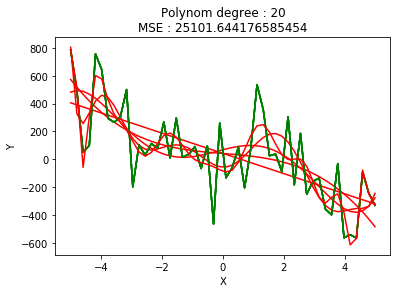

In [15]:
# Vaš kôd ovdje
degrees = [1,3,5,10,20]
models = []
mean_squared_errors = []
predictions = []

for d in degrees:
    transformed = PolynomialFeatures(d).fit_transform(X)
    model = LinearRegression(False).fit(transformed, y)
    models.append(model)
    prediction = model.predict(transformed)
    predictions.append(prediction)
    mean_squared_errors.append(mean_squared_error(y,prediction))

min_error = min(mean_squared_errors)
index_of_min = np.argmin(mean_squared_errors)

print("\nMinimal error : " + str(min_error))
print("\nBelongs to polynom of degree : " + str(degrees[index_of_min]))


for degree,MSE,prediction in zip(degrees,mean_squared_errors,predictions):
    plt.title("Polynom degree : " + str(degree) + "\nMSE : " + str(MSE))
    plt.plot(X,y,'g')
    plt.plot(X,prediction,'r')

plt.xlabel("X")
plt.ylabel("Y")
plt.show()


### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih pet modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

In [16]:
from sklearn.model_selection import train_test_split

Lowest error for degree : 6
Max error :  120614856057267.3


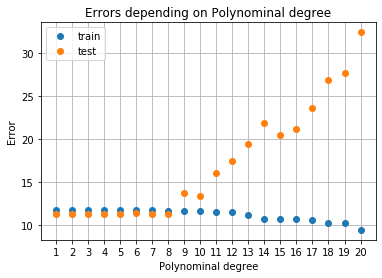

In [17]:
# Vaš kôd ovdje
degrees = [i+1 for i in range(20) ]

X_train,X_test = train_test_split(X,test_size=0.5)
y_train,y_test = train_test_split(y,test_size=0.5)

models = []
train_errors = []
test_errors = []
train_predictions = []
test_predictions = []

for d in degrees:
    # transform examples
    train_transformed = PolynomialFeatures(d).fit_transform(X_train)
    test_transformed = PolynomialFeatures(d).fit_transform(X_test)
    
    # model training
    model = LinearRegression(False).fit(train_transformed, y_train)
    models.append(model)
    
    # train and test predictions
    train_prediction = model.predict(train_transformed)
    test_prediction = model.predict(test_transformed)
    train_predictions.append(train_prediction)
    test_predictions.append(test_prediction)
    
    # prediction errors
    train_errors.append(mean_squared_error(y_train,train_prediction))
    test_errors.append(mean_squared_error(y_test,test_prediction))

print("Lowest error for degree :",np.argmin(test_errors))
print("Max error : ",np.max(test_errors))

# convert errors using log(x)
train_errors = [np.log(x) for x in train_errors]
test_errors = [np.log(x) for x in test_errors]

plt.xticks(degrees)
plt.title("Errors depending on Polynominal degree")
plt.plot(degrees,train_errors,'o',label="train")
plt.plot(degrees,test_errors,'o',label="test")
plt.xlabel("Polynominal degree")
plt.ylabel("Error")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

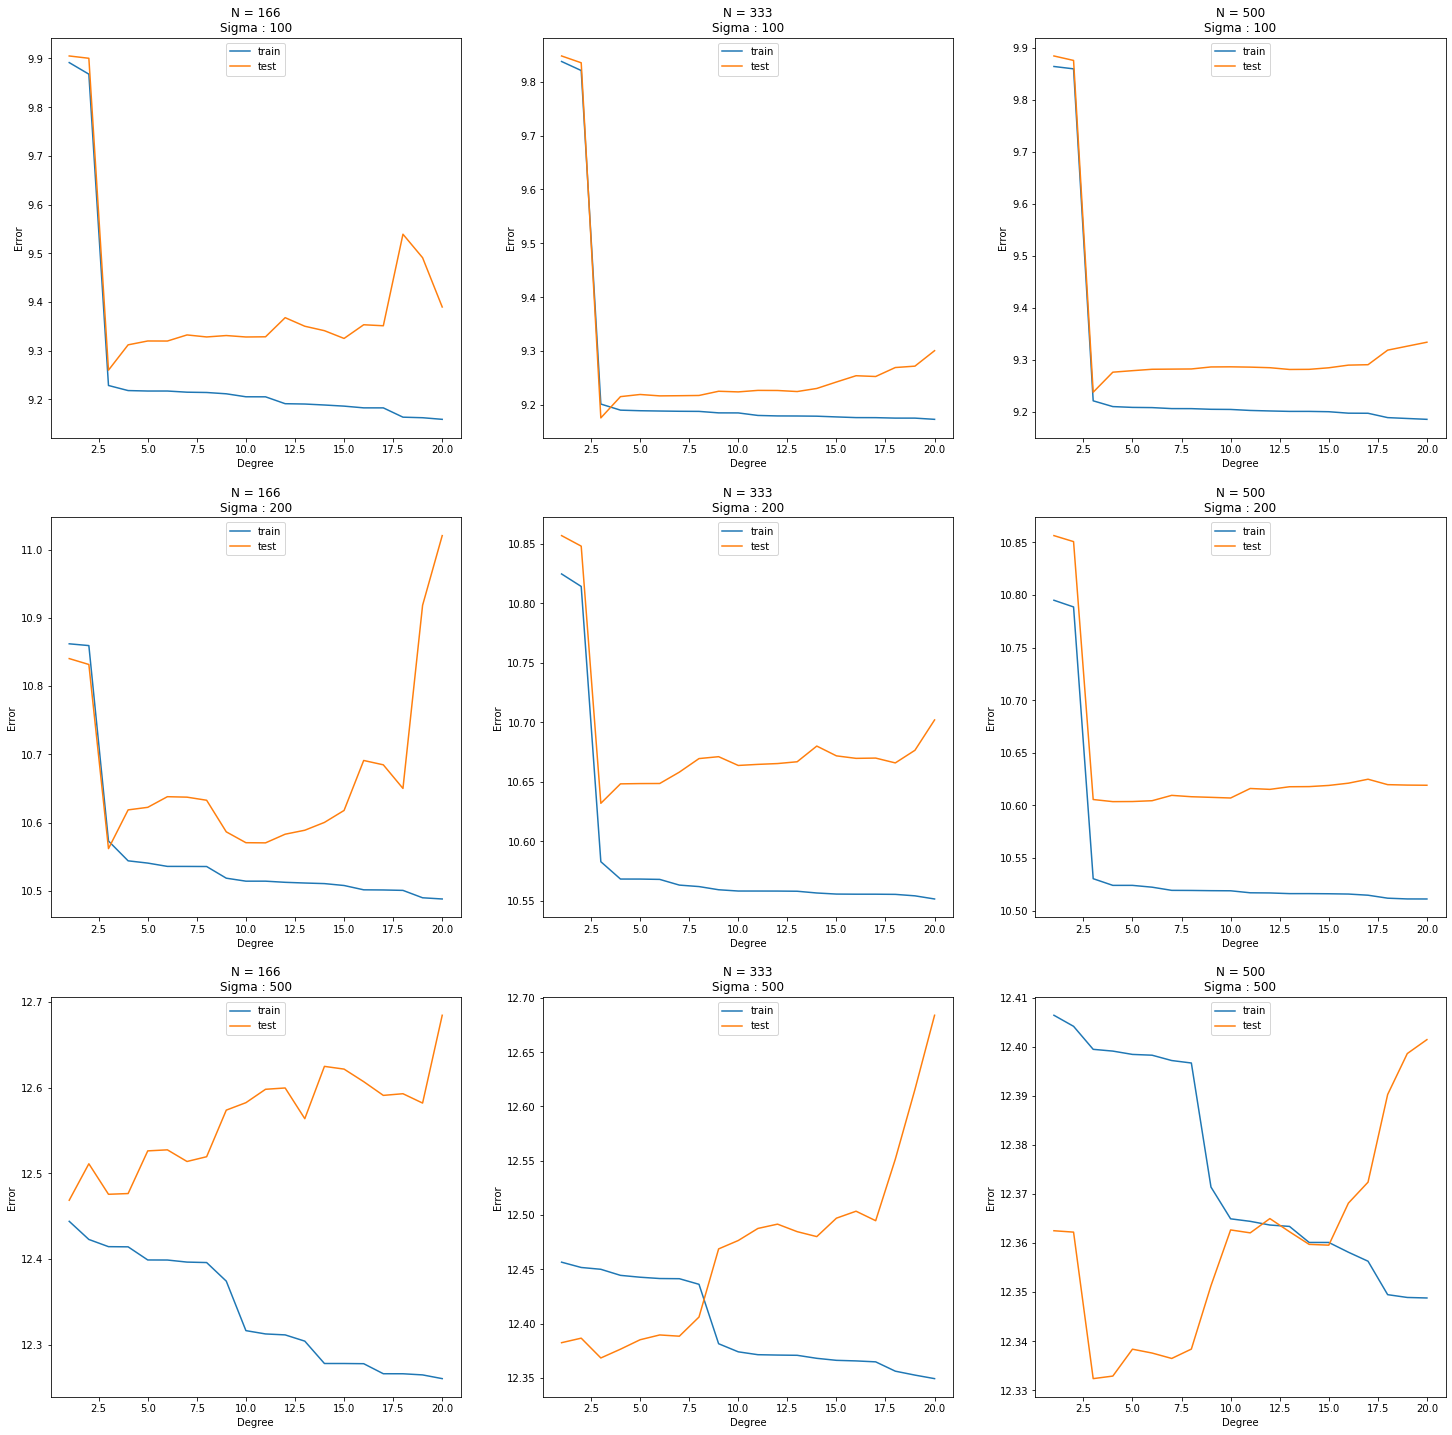

In [18]:
# Vaš kôd ovdje
function = lambda x : 5 + x -2*(x**2) - 5*(x**3)

N = 1000
degrees = [i+1 for i in range(20)]
sigmas = [100,200,500]
X = make_instances(-5,5,N)

X_train, X_test = train_test_split(X,test_size=0.5)


dataset = []
for sigma in sigmas:
    y_train = make_labels(X_train,function,sigma)
    y_test = make_labels(X_test,function,sigma)
    dataset.append((X_train,X_test,y_train,y_test))



all_datasets = []
for data in dataset:
    X_train,X_test,y_train,y_test = data
    third = len(X_train)//3
    two_thirds = 2*len(X_train)//3
    third_of_dataset = (X_train[0:third],X_test[0:third],y_train[0:third],y_test[0:third])
    two_thirds_of_dataset = (X_train[0:two_thirds],X_test[0:two_thirds],y_train[0:two_thirds],y_test[0:two_thirds])
    whole_dataset = data
    all_datasets.append((third_of_dataset,two_thirds_of_dataset,whole_dataset))


fig, axs = plt.subplots(3, 3,figsize=(25,25))

sigma_index = 0

for i,three_datasets in enumerate(all_datasets):
    for j,dataset in enumerate(three_datasets):
        X_train,X_test,y_train,y_test = dataset
        
        train_errors = []
        test_errors = []
        train_predictions = []
        test_predictions = []
        
        for d in degrees:
            # transform examples
            train_transformed = PolynomialFeatures(d).fit_transform(X_train)
            test_transformed = PolynomialFeatures(d).fit_transform(X_test)
            
            # model training
            model = LinearRegression(False).fit(train_transformed, y_train)
            
            # train and test predictions
            train_prediction = model.predict(train_transformed)
            test_prediction = model.predict(test_transformed)
            train_predictions.append(train_prediction)
            test_predictions.append(test_prediction)
            
            # prediction errors
            train_errors.append(mean_squared_error(y_train,train_prediction))
            test_errors.append(mean_squared_error(y_test,test_prediction))
            
        # convert errors using log(x)
        train_errors = [np.log(x) for x in train_errors]
        test_errors = [np.log(x) for x in test_errors]
        
        axs[i,j].plot(degrees, train_errors, label="train")
        axs[i,j].plot(degrees,test_errors,label="test")
        axs[i,j].legend(loc="upper center")
        axs[i,j].set_xlabel("Degree")
        axs[i,j].set_ylabel("Error")
        axs[i,j].set_title("N = " + str(len(X_train))+"\nSigma : "+str(sigmas[sigma_index%3]))
    sigma_index += 1 
        

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [19]:
# Vaš kôd ovdje

X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

lambdas = [0,1,10]
weights = []
fi = PolynomialFeatures(3)
transformed = fi.fit_transform(X) 

for l in lambdas:
    
    # shape 4,4
    fi_T_fi = np.dot(np.transpose(transformed),transformed)
    
    I = np.eye(fi_T_fi.shape[0])
    I[0][0] = 0
    
    pseudoinverse = np.dot(linalg.inv(fi_T_fi + l*I ),np.transpose(transformed))
    #pseudoinverse = linalg.pinv(transformed)
    weights.append(np.dot(pseudoinverse,y))

for w,l in zip(weights,lambdas):
    print("Lambda : " + str(l))
    print("Weights : " + str(w))



Lambda : 0
Weights : [ 4.         -5.91666667  3.375      -0.45833333]
Lambda : 1
Weights : [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
Lambda : 10
Weights : [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`).

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [20]:
from sklearn.linear_model import Ridge,Lasso

In [21]:
# Vaš kôd ovdje
lambdas = [0,1,10]
weights = []
fi = PolynomialFeatures(3)
transformed = fi.fit_transform(X) 

for l in lambdas:
    reg_model = Ridge(alpha = l,fit_intercept=True)
    reg_model.fit(transformed, y)
    print("Lambda : " + str(l))
    print("Weights : " + str(reg_model.coef_))
    print("Intercept : " + str(reg_model.intercept_))
    


Lambda : 0
Weights : [ 0.         -5.91666667  3.375      -0.45833333]
Intercept : 4.000000000000028
Lambda : 1
Weights : [ 0.         -0.69079365 -0.2831746   0.1445805 ]
Intercept : 3.0569614512471652
Lambda : 10
Weights : [ 0.         -0.15897295 -0.13423067  0.0815601 ]
Intercept : 2.4944418431229725


### 5. Regularizirana polinomijalna regresija

### (a)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

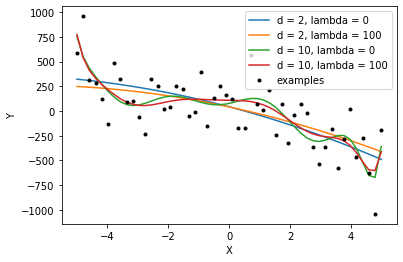

In [22]:
# Vaš kôd ovdje
X = make_instances(-5,5,50)

function = lambda x : 5 + x -2*(x**2) - 5*(x**3)
y = make_labels(X,function,200)

lambdas = [0,100]
degrees = [2,10]

weights = []
predictions = []
for d in degrees:
    fi = PolynomialFeatures(d)
    transformed = fi.fit_transform(X) 
    for l in lambdas:
        reg_model = Ridge(alpha=l)
        reg_model.fit(transformed,y)
        weights.append(reg_model.coef_)
        prediction = reg_model.predict(transformed)
        predictions.append(prediction)
        plt.plot(X,prediction,label="d = "+ str(d) + ", lambda = " +str(l))


plt.plot(X,y,'k.',label="examples")
plt.legend(loc="upper right")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


### (b)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


Minimal error for lambda :  50
906556.4802970416


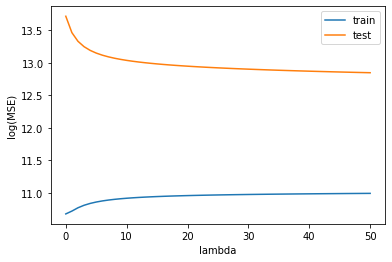

In [23]:
# Vaš kôd ovdje
X = make_instances(-5,5,50)

function = lambda x : 5 + x -2*(x**2) - 5*(x**3)
y = make_labels(X,function,200)

X_train,X_test = train_test_split(X,test_size=0.5)
y_train,y_test = train_test_split(y,test_size=0.5)

#X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.5)

d = 10
lambdas = [i for i in range(0,51)]

train_errors = []
test_errors = []
train_predictions = []
test_predictions = []

fi = PolynomialFeatures(d)
X_train_transformed = fi.fit_transform(X_train)
X_test_transformed = fi.fit_transform(X_test)



for l in lambdas:
    reg_model = Ridge(alpha=l)
    
    # model training
    reg_model.fit(X_train_transformed,y_train)
    
    # predictions
    train_prediction = reg_model.predict(X_train_transformed)
    test_prediction = reg_model.predict(X_test_transformed)
    train_predictions.append(train_prediction)
    test_predictions.append(test_prediction)
    
    
    train_errors.append(mean_squared_error(y_train,train_prediction))
    test_errors.append(mean_squared_error(y_test,test_prediction))

print("Minimal error for lambda : ",np.argmin(test_errors))
print(np.max(test_errors))



# convert errors using log(x)
train_errors = [np.log(x) for x in train_errors]
test_errors = [np.log(x) for x in test_errors]

plt.plot(lambdas,train_errors,label="train")
plt.plot(lambdas,test_errors,label="test")
plt.xlabel("lambda")
plt.ylabel("log(MSE)")
plt.legend(loc="upper right")
plt.show()


### 6. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [24]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=10$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

Non-zero weights/All weights :  10 / 11
[[ 0.00000000e+00 -3.05427239e+00 -1.10956694e+01 -5.93720405e+00
   2.72577661e+00 -5.73293630e-01  1.07865525e-01  9.95447156e-02
  -8.12077532e-03 -2.57888155e-03 -3.61177176e-05]]


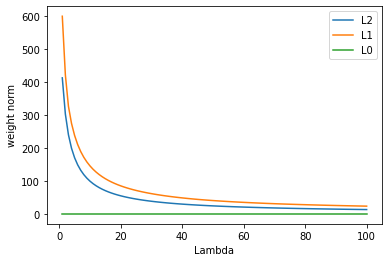

In [32]:
# Vaš kôd ovdje

# train and test sets
X = make_instances(-5,5,50)

function = lambda x : 5 + x -2*(x**2) - 5*(x**3)
y = make_labels(X,function,200)

X_train,X_test = train_test_split(X,test_size=0.5)
y_train,y_test = train_test_split(y,test_size=0.5)

d = 10
lambdas = [i for i in range(1,101)]

train_errors = []
test_errors = []
train_predictions = []
test_predictions = []

fi = PolynomialFeatures(d)
X_train_transformed = fi.fit_transform(X_train)
X_test_transformed = fi.fit_transform(X_test)

L2_weights = []
L1_weights = []
L0_weights = []



for l in lambdas:
    reg_model = Ridge(alpha=l,fit_intercept=True)
    
    # model training
    reg_model.fit(X_train_transformed,y_train)
    
    # predictions    
    weight = reg_model.coef_
    
    L2_weight = np.sqrt(np.dot(weight,np.transpose(weight)))[0][0]
    L1_weight = sum([abs(x) for x in weight])
    L0_weight = np.count_nonzero(weight)
    
    L2_weights.append(L2_weight)
    L1_weights.append(L1_weight)
    L0_weights.append(nonzeroes(weight))
    
    if l == 100:
        print("Non-zero weights/All weights : ",nonzeroes(weight[0]),"/",len(weight[0]))
        print(weight)
        
plt.plot(lambdas,L2_weights,label="L2")
plt.plot(lambdas,L1_weights,label="L1")
plt.plot(lambdas,L0_weights,label="L0")
plt.xlabel("Lambda")
plt.ylabel("weight norm")
plt.legend(loc="upper right")
plt.show()






### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Zanemarite upozorenja.

Non-zero weights/All weights :  7 / 11
[ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -7.08619753e+00  3.45576002e-01  7.04409434e-01 -3.11825391e-02
  1.86540868e-04  1.17085321e-03 -7.77982403e-04]


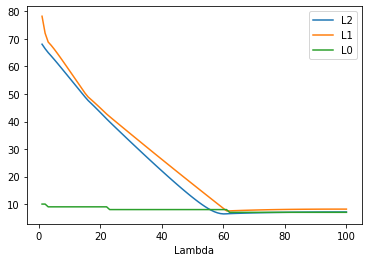

In [34]:
# Vaš kôd ovdje

# train and test sets
X = make_instances(-5,5,50)

function = lambda x : 5 + x -2*(x**2) - 5*(x**3)
y = make_labels(X,function,100)

X_train,X_test = train_test_split(X,test_size=0.5)
y_train,y_test = train_test_split(y,test_size=0.5)

d = 10
lambdas = [i for i in range(1,101)]

train_errors = []
test_errors = []
train_predictions = []
test_predictions = []

fi = PolynomialFeatures(d)
X_train_transformed = fi.fit_transform(X_train)
X_test_transformed = fi.fit_transform(X_test)

L2_weights = []
L1_weights = []
L0_weights = []



for l in lambdas:
    reg_model = Lasso(alpha=l,fit_intercept=True)
    
    # model training
    reg_model.fit(X_train_transformed,y_train)
    
    # predictions    
    weight = reg_model.coef_

    L2_weight = np.sqrt(np.dot(weight,np.transpose(weight)))
    L1_weight = sum([abs(x) for x in weight])
    L0_weight = np.count_nonzero(weight)
    
    L2_weights.append(L2_weight)
    L1_weights.append(L1_weight)
    L0_weights.append(nonzeroes(weight))
    
    if l == 100:
        print("Non-zero weights/All weights : ",nonzeroes(weight),"/",len(weight))
        print(weight)
        
plt.plot(lambdas,L2_weights,label="L2")
plt.plot(lambdas,L1_weights,label="L1")
plt.plot(lambdas,L0_weights,label="L0")
plt.xlabel("Lambda")
plt.legend(loc="upper right")
plt.show()


### 7. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [119]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

**a)** Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

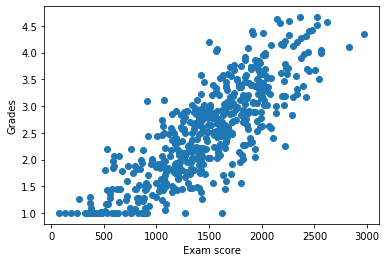

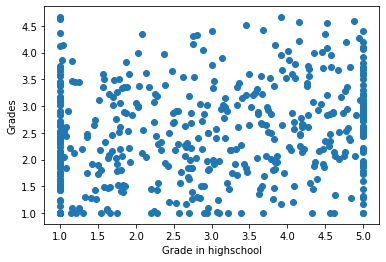

In [120]:
# Vaš kôd ovdje
scores = [grade[0] for grade in grades_X]
average_grades = [grade[1] for grade in grades_X]


plt.scatter(scores, grades_y)
plt.xlabel("Exam score")
plt.ylabel("Grades")
plt.show()

plt.scatter(average_grades,grades_y)
plt.xlabel("Grade in highschool")
plt.ylabel("Grades")
plt.show()


**b)** Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

[Exam score , Grade in highschool] [1.95800000e+03 1.86706705e+00]
Weights:
[0.00141497 0.09477276]
Test error
0.23990435033172805


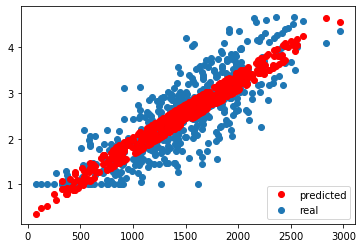

In [122]:
# Vaš kôd ovdje
lambd = 0.01

print("[Exam score , Grade in highschool]",grades_X[0])
reg_model = Ridge(alpha=lambd)
    
# model training
reg_model.fit(grades_X,grades_y)

    
# predictions
test_prediction = reg_model.predict(grades_X)    
    
#train_error = mean_squared_error(y_train,train_prediction)
test_error = mean_squared_error(grades_y,test_prediction)

weights = reg_model.coef_

print("Weights:")
print(weights)
print("Test error")
print(test_error)

plt.scatter(grades_X.transpose()[0],grades_y,label="real")
plt.plot(grades_X.transpose()[0],test_prediction,'ro',label="predicted")
plt.legend(loc="lower right")
plt.show()
    

Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [39]:
from sklearn.preprocessing import StandardScaler

Before scaling ([Exam score , Grade in highschool]): [1.95800000e+03 1.86706705e+00]
After scaling ([Exam score , Grade in highschool]): [ 0.95063817 -0.78607869]
Weights:
[[0.81630375 0.15167761]]
Error
0.29228757017069595


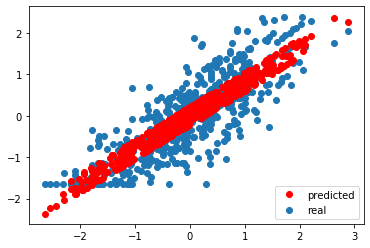

In [123]:
#normalno radi
# Vaš kôd ovdje
lambd = 0.01
scaler = StandardScaler()
print("Before scaling ([Exam score , Grade in highschool]): " + str(grades_X[0]))
scaler.fit(grades_X)
grades_X_fixed = scaler.transform(grades_X)
grades_y_fixed = StandardScaler().fit_transform(grades_y.reshape(-1,1))
print("After scaling ([Exam score , Grade in highschool]): " + str(grades_X_fixed[0]))

reg_model = Ridge(alpha=lambd)
    
# model training
reg_model.fit(grades_X_fixed,grades_y_fixed)

    
# predictions
test_prediction = reg_model.predict(grades_X_fixed)    
    
test_error = mean_squared_error(grades_y_fixed,test_prediction)

weights = reg_model.coef_

print("Weights:")
print(weights)
print("Error")
print(test_error)
weights = weights[0]
x_axis = [i for i in range(len(weights))]

plt.scatter(grades_X_fixed.transpose()[0],grades_y_fixed,label="real")
plt.plot(grades_X_fixed.transpose()[0],test_prediction,'ro',label="predicted")
plt.legend(loc="lower right")
plt.show()

**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 8. Multikolinearnost i kondicija matrice

**a)** Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [41]:
# Vaš kôd ovdje

grades_X_fixed_colinear = np.insert(grades_X_fixed,2,grades_X_fixed[:,1],axis=1)

print(grades_X_fixed_colinear)


[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

[1.95800000e+03 1.86706705e+00]
Weights:
[0.73954673 0.06870839 0.06870839]


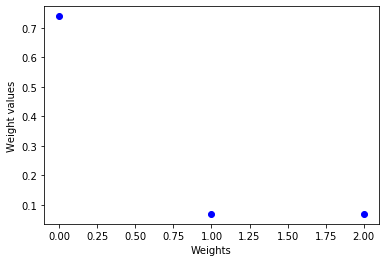

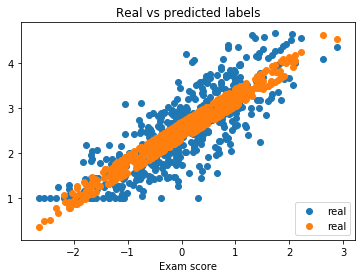

In [42]:
# Vaš kôd ovdje
lambd = 0.01

print(grades_X[0])


reg_model = Ridge(alpha=lambd)
    
# model training
reg_model.fit(grades_X_fixed_colinear,grades_y)

    
# predictions
train_prediction = reg_model.predict(grades_X_fixed_colinear)    
    
train_error = mean_squared_error(grades_y,test_prediction)

weights = reg_model.coef_

print("Weights:")
print(weights)
x_axis = [i for i in range(len(weights))]


plt.plot(x_axis,abs(weights),'bo')
plt.xlabel("Weights")
plt.ylabel("Weight values")
plt.show()

plt.title("Real vs predicted labels")
plt.scatter(grades_X_fixed_colinear.transpose()[0],grades_y,label="real")
plt.scatter(grades_X_fixed_colinear.transpose()[0],train_prediction,label="real")
plt.xlabel("Exam score")
plt.legend(loc="lower right")
plt.show()

**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

**b)** Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

Model with lambda 0.01
Weights:
[ 0.57179395 -0.05018896 -0.05018896]

Model with lambda 1000
Weights:
[0.11703537 0.00648805 0.00648805]
Model with lambda 0.01
Weights:
[ 0.60682429 -0.04169272 -0.04169272]

Model with lambda 1000
Weights:
[ 0.12005076 -0.01391842 -0.01391842]
Model with lambda 0.01
Weights:
[0.73235417 0.27252662 0.27252662]

Model with lambda 1000
Weights:
[0.14605829 0.0919262  0.0919262 ]
Model with lambda 0.01
Weights:
[0.8567689  0.07353587 0.07353587]

Model with lambda 1000
Weights:
[0.1785541  0.03278669 0.03278669]
Model with lambda 0.01
Weights:
[0.84467536 0.03883167 0.03883167]

Model with lambda 1000
Weights:
[0.17216285 0.02167042 0.02167042]
Model with lambda 0.01
Weights:
[0.66541249 0.21072216 0.21072216]

Model with lambda 1000
Weights:
[0.1338161 0.0740056 0.0740056]
Model with lambda 0.01
Weights:
[0.39678267 0.08014695 0.08014695]

Model with lambda 1000
Weights:
[0.0814162  0.02816627 0.02816627]
Model with lambda 0.01
Weights:
[0.8053097  0.031

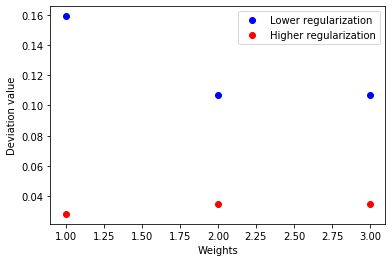

In [43]:
# Vaš kôd ovdje

lambda_lower = 0.01
lambda_higher = 1000

lower_weights = []
higher_weights = []

for i in range(10):
    
    # random choosing
    size = len(grades_X_fixed_colinear)
    indexes = np.random.choice(500, int(size/2))

    random_grades_X = []
    random_grades_y = []

    for i in indexes:
        random_grades_X.append(grades_X_fixed_colinear[i])
        random_grades_y.append(grades_y[i])

    random_grades_X = np.vstack(random_grades_X)
    random_grades_y = np.asarray(random_grades_y)
    
    lower_lambda_model = Ridge(lambda_lower,fit_intercept = False)
    higher_lambda_model = Ridge(lambda_higher,fit_intercept = False)
    
    lower_lambda_model.fit(random_grades_X,random_grades_y)
    higher_lambda_model.fit(random_grades_X,random_grades_y)
    #print("---")
    print("Model with lambda 0.01\nWeights:")
    print(lower_lambda_model.coef_)    
    print("\nModel with lambda 1000\nWeights:")
    print(higher_lambda_model.coef_)
    #print("---")
    
    lower_weights.append(lower_lambda_model.coef_)
    higher_weights.append(higher_lambda_model.coef_)

lower_weight1 = []
lower_weight2 = []
lower_weight3 = []
    
higher_weight1 = []
higher_weight2 = []
higher_weight3 = []

for l_weights,h_weights in zip(lower_weights,higher_weights):
    l_w1,l_w2,l_w3 = l_weights[0],l_weights[1],l_weights[2]
    h_w1,h_w2,h_w3 = h_weights[0],h_weights[1],h_weights[2]
    
    lower_weight1.append(l_w1)
    lower_weight2.append(l_w2)
    lower_weight3.append(l_w3)
    
    higher_weight1.append(h_w1)
    higher_weight2.append(h_w2)
    higher_weight3.append(h_w3)
    
deviation_w1_lower = np.std(lower_weight1)
deviation_w2_lower = np.std(lower_weight2)
deviation_w3_lower = np.std(lower_weight3)

deviation_w1_higher = np.std(higher_weight1)
deviation_w2_higher = np.std(higher_weight2)
deviation_w3_higher = np.std(higher_weight3)

x_axis = [i for i in range(1,4)]
lower_deviations = [deviation_w1_lower,deviation_w2_lower,deviation_w3_lower]
higher_deviations = [deviation_w1_higher,deviation_w2_higher,deviation_w3_higher]
plt.plot(x_axis,lower_deviations,'bo',label="Lower regularization") 
plt.plot(x_axis,higher_deviations,'ro',label="Higher regularization")
plt.legend(loc="upper right")
plt.ylabel("Deviation value")
plt.xlabel("Weights")
plt.show()




**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.

**c)** Koristeći [`numpy.linalg.cond`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.cond.html) izračunajte kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$, gdje je $\mathbf{\Phi}$ matrica dizajna (`grades_X_fixed_colinear`). Ponovite i za $\lambda=0.01$ i za $\lambda=10$.


In [124]:
# Vaš kôd ovdje
lambda_lower = 0.01
lambda_higher = 10
m,n = grades_X_fixed_colinear.shape

gram_matrix_lower  = np.dot(np.transpose(grades_X_fixed_colinear),grades_X_fixed_colinear)+lambda_lower*np.eye(n)
gram_matrix_higher  = np.dot(np.transpose(grades_X_fixed_colinear),grades_X_fixed_colinear)+lambda_higher*np.eye(n)

print("Lower regularization:\n" + str(gram_matrix_lower))
print("Condition number : " + str(np.linalg.cond(gram_matrix_lower)))
print()
print("Higher regularization:\n" + str(gram_matrix_higher))
print("Condition number : " + str(np.linalg.cond(gram_matrix_higher)))




Lower regularization:
[[500.01        37.00469301  37.00469301]
 [ 37.00469301 500.01       500.        ]
 [ 37.00469301 500.         500.01      ]]
Condition number : 100542.86653460482

Higher regularization:
[[510.          37.00469301  37.00469301]
 [ 37.00469301 510.         500.        ]
 [ 37.00469301 500.         510.        ]]
Condition number : 101.54186653499362


**Q:** Kako regularizacija utječe na kondicijski broj matrice $\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I}$?  